In [ ]:
!pip install arch
!pip install yfinance

In [ ]:
import arch
import statsmodels.api as sm
import yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
GetDJIinfo = yfinance.Ticker("^DJI")
DJIA = GetDJIinfo.history(period="2y")
DJIA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-23,26835.240234,26896.890625,26745.000000,26833.949219,247680000,0,0
2019-10-24,26893.929688,26931.779297,26714.339844,26805.529297,253590000,0,0
2019-10-25,26789.609375,27015.369141,26765.679688,26958.060547,274610000,0,0
2019-10-28,27040.330078,27167.880859,27028.710938,27090.720703,290770000,0,0
2019-10-29,27061.070312,27165.939453,27039.759766,27071.460938,269610000,0,0


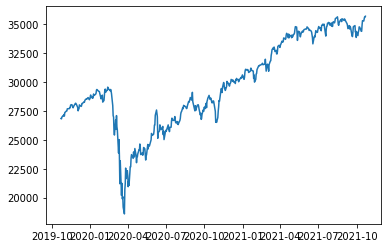

In [ ]:
plt.plot(DJIA['Close'])

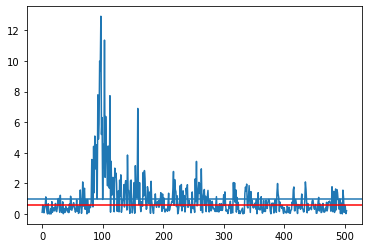

In [ ]:
returns = 100 * DJIA['Close'].pct_change().dropna()
returns = returns.to_numpy()
returns = np.abs(returns)
plt.plot(returns)
plt.axhline(y=np.mean(returns))
plt.axhline(y=np.median(returns),color='red')

In [ ]:
am = arch.arch_model(returns)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 637.1480185217865
Iteration:      2,   Func. Count:     17,   Neg. LLF: 567.9341071899885
Iteration:      3,   Func. Count:     25,   Neg. LLF: 565.5620403488422
Iteration:      4,   Func. Count:     32,   Neg. LLF: 564.856299984962
Iteration:      5,   Func. Count:     40,   Neg. LLF: 564.8016988032869
Iteration:      6,   Func. Count:     46,   Neg. LLF: 564.1501624807245
Iteration:      7,   Func. Count:     54,   Neg. LLF: 564.1225969786685
Iteration:      8,   Func. Count:     62,   Neg. LLF: 563.7622132401517
Iteration:      9,   Func. Count:     68,   Neg. LLF: 563.7607393280718
Iteration:     10,   Func. Count:     74,   Neg. LLF: 563.7607206534066
Iteration:     11,   Func. Count:     80,   Neg. LLF: 563.7607183954306
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 563.7607183954169
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11

In [ ]:
p_list = [i for i in range(1,10)]
q_list = [i for i in range(0,10)]
accuracy = dict()

for p in p_list:
  for q in q_list:
    print(p,q)
    predictions = np.zeros(10)
    for i in range(128,138):
      am = arch.arch_model(returns[i:i+365],p=p,q=q,vol='GARCH',)
      model_fit = am.fit()
      pred = model_fit.forecast(horizon=1)
      predictions[i-128] = pred.variance.values[-1][0]
    accuracy[(p,q)] = np.sqrt(np.sum(((predictions-returns[-10:])/returns[-10:])**2))

In [ ]:
len(returns)

504

In [ ]:
504-128

376

In [ ]:
min_err = 10000000
max_pq = (0,0)
for key,value in accuracy.items():
  if value < min_err:
    max_pq = key
    min_err = value

print(max_pq,accuracy[max_pq])

(1, 8) 130.8280300823566


In [ ]:
for key,value in accuracy.items():
  print(key,value)

(1, 0) 343.60476719813676
(1, 1) 184.57961632097346
(1, 2) 184.57958672135678
(1, 3) 184.58047660919715
(1, 4) 184.58311468330345
(1, 5) 184.57818029843867
(1, 6) 130.8894998516282
(1, 7) 130.87464352386883
(1, 8) 130.8280300823566
(1, 9) 131.4051905722299
(2, 0) 308.35271712698653
(2, 1) 193.02322543993077
(2, 2) 212.05028411841613
(2, 3) 211.79467205841055
(2, 4) 211.7978115952593
(2, 5) 216.1477145639474
(2, 6) 216.1480477692707
(2, 7) 211.25405682793908
(2, 8) 211.2538509637009
(2, 9) 207.29375505062848
(3, 0) 229.82504193686617
(3, 1) 193.02269876230355
(3, 2) 212.05326457254728
(3, 3) 211.7936100670391
(3, 4) 211.7871572423444
(3, 5) 216.14333082639573
(3, 6) 216.14830307875187
(3, 7) 211.26184558894673
(3, 8) 211.2642530588565
(3, 9) 207.2926757924816
(4, 0) 212.96753712695488
(4, 1) 181.43025740669268
(4, 2) 198.4177486939541
(4, 3) 196.81054984979016
(4, 4) 200.49593281244105
(4, 5) 193.0623054629994
(4, 6) 193.05583386595362
(4, 7) 189.9993075060054
(4, 8) 189.98889994390558
